<a href="https://colab.research.google.com/github/Sovanno/NLP/blob/main/LAB5_AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Згрузка и предобработка данных

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_parquet('0000.parquet', engine='pyarrow')
df_test = pd.read_parquet('0000 (1).parquet', engine='pyarrow')

print(df_train.head(5))
print('-----------------------------------------------------------------------')
print(df_test.head(5))

                                                text  \
0  Сладострастник в течение трех лет преследовал ...   
1  Буквально за час до боя курантов в подземном п...   
2  Там они покатались на лыжах и снегоходах, пооб...   
3  Сосед расстрелял соседа из-за претензий по пов...   
4  Причиной трагедии специалисты считают нарушени...   

                                             summary     topic  \
0  Старший преподаватель института коммунального ...  incident   
1  Манежная площадь Москвы стала местом последнег...  incident   
2  Президент РФ Дмитрий Медведев с семьей проводи...  politics   
3  Первое убийство в 2010 году произошло в Москве...  incident   
4  Шесть человек, в том числе 9-летний ребенок, з...  incident   

                                                 url  \
0  https://www.mk.ru/incident/article/2010/01/05/...   
1  https://www.mk.ru/incident/article/2010/01/05/...   
2  https://www.mk.ru/politics/article/2010/01/05/...   
3  https://www.mk.ru/incident/article/2010

- Оставить только текст.
- Преобразовать текст в нижний регистр.
- Удалить знаки препинания, специальные символы и числа.
- Удалить стоп-слова.

In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 56.9 MB/s eta 0:00:00


In [ ]:
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
from pymorphy3 import MorphAnalyzer

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)

    word_list = word_tokenize(text)
    stopwords_list = set(stopwords.words('russian'))

    word_list = [word for word in word_list if word not in stopwords_list]

    lemma = MorphAnalyzer()
    word_list = [lemma.normal_forms(word)[0] for word in word_list]
    text= ' '.join(word_list)

    return text

In [ ]:
df_train['text_p'] = df_train['text'].iloc[:5000].apply(preprocess_text)
df_test['text_p'] = df_test['text'].iloc[:1000].apply(preprocess_text)

print(df_train.head(5))
print('-----------------------------------------------------------------------')
print(df_test.head(5))

                                                text  \
0  Сладострастник в течение трех лет преследовал ...   
1  Буквально за час до боя курантов в подземном п...   
2  Там они покатались на лыжах и снегоходах, пооб...   
3  Сосед расстрелял соседа из-за претензий по пов...   
4  Причиной трагедии специалисты считают нарушени...   

                                             summary     topic  \
0  Старший преподаватель института коммунального ...  incident   
1  Манежная площадь Москвы стала местом последнег...  incident   
2  Президент РФ Дмитрий Медведев с семьей проводи...  politics   
3  Первое убийство в 2010 году произошло в Москве...  incident   
4  Шесть человек, в том числе 9-летний ребенок, з...  incident   

                                                 url  \
0  https://www.mk.ru/incident/article/2010/01/05/...   
1  https://www.mk.ru/incident/article/2010/01/05/...   
2  https://www.mk.ru/politics/article/2010/01/05/...   
3  https://www.mk.ru/incident/article/2010

# Векторизация документов и загрузка коллекции

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=20000)

df_train_cleaned = df_train.dropna(subset=['text_p'])
df_test_cleaned = df_test.dropna(subset=['text_p'])
m_train = vectorizer.fit_transform(df_train_cleaned['text_p'])
m_test = vectorizer.transform(df_test_cleaned['text_p'])

print(f"Размер обучающей выборки: {m_train.shape}")
print(f"Размер тестовой выборки: {m_test.shape}")

Размер обучающей выборки: (5000, 20000)
Размер тестовой выборки: (757, 20000)


Получаем значения n_wd количество слов на документ

In [ ]:
n_wd_train = m_train.todense().T
n_wd_test = m_test.todense().T

In [ ]:
#!pip install bigartm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.9 MB/s eta 0:00:00


In [ ]:
#! pip uninstall protobuf

Found existing installation: protobuf 4.25.5
Uninstalling protobuf-4.25.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.10/dist-packages/google/protobuf/*
    /usr/local/lib/python3.10/dist-packages/protobuf-4.25.5.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled protobuf-4.25.5


In [ ]:
#! pip install protobuf==3.19.*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-aiplatform 1.74.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-connection 1.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-storage 2.27.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-b

In [ ]:
from artm import BatchVectorizer

In [ ]:
vocabulary = vectorizer.get_feature_names_out()
vocabulary

array(['00', '000', '000 000', ..., 'ёжик', 'ёлка', 'ёмкость'],
      dtype=object)

In [ ]:
batch_vectorizer = BatchVectorizer(data_format='bow_n_wd', n_wd=n_wd_train, vocabulary=vocabulary, target_folder='batches')
batch_vectorizer

/usr/local/lib/python3.10/dist-packages/artm/batches_utils.py:227: DeprecationWarning: Please import `spmatrix` from the `scipy.sparse` namespace; the `scipy.sparse.base` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.sparse.base import spmatrix


artm.BatchVectorizer(data_path="batches", num_batches=5)

# Обучение модельи LDA, определение темы для тестовой выборки, график перплексии, рассчитывание перплексия тестовой выборки;

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import artm

alpha: Гиперпараметр, который контролирует распределение тем в документах. Чем больше значение alpha, тем более равномерно темы будут распределены по документам. Малые значения приводят к более сжато́му распределению, при котором документы будут склонны содержать только немногие темы. Значение по умолчанию обычно составляет 0.1.

beta: Гиперпараметр, который контролирует распределение слов в темах. Похожие на alpha, чем больше значение beta, тем более равномерно слова будут распределены по темам. Малые значения приведут к более компактным темам с меньшим количеством слов. Значение по умолчанию обычно составляет 0.01 или 0.1.

num_document_passes: Количество проходов по документам во время обучения модели. Это число определяет, сколько раз алгоритм будет обновлять параметры модели, просматривая все документы. Большее количество проходов может привести к лучшему качеству обучения, но также увеличивает время вычислений. Настройка этого параметра зависит от вашего объема данных и требований к производительности.

offline - проходим коллекцию несколько раз, обновляем  Φ  в конце каждого прохода.

матрица  Θ  обновляется на каждой итерации.

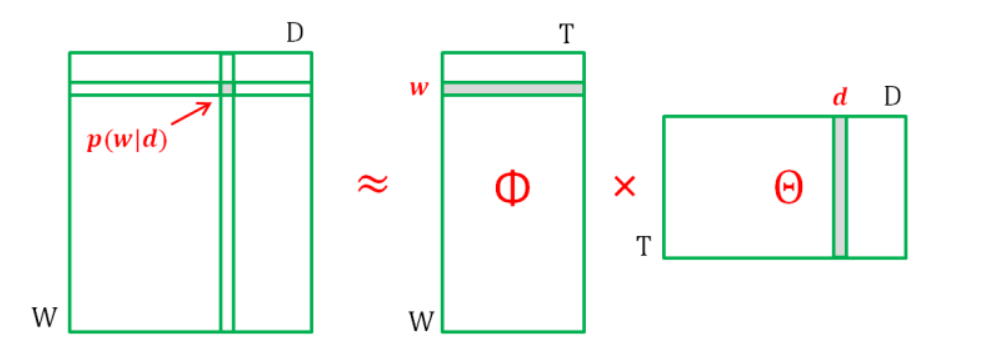

In [ ]:
num_topics = 10
lda_model = artm.LDA(num_topics=num_topics, alpha=0.1, beta=0.1, num_document_passes=15, dictionary=batch_vectorizer.dictionary)

lda_model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
lda_model.save('lda_p_wt', model_name='p_wt')
lda_model.save('lda_n_wt', model_name='n_wt')

Измеряет, насколько модель соответствует данным.
Снижение значения перплексии указывает на улучшение модели.

In [ ]:
lda_model.perplexity_value

[19734.390625,
 5662.7021484375,
 5408.34716796875,
 4992.4072265625,
 4614.5703125,
 4361.150390625,
 4204.15673828125,
 4105.5654296875,
 4041.227294921875,
 3997.94970703125]

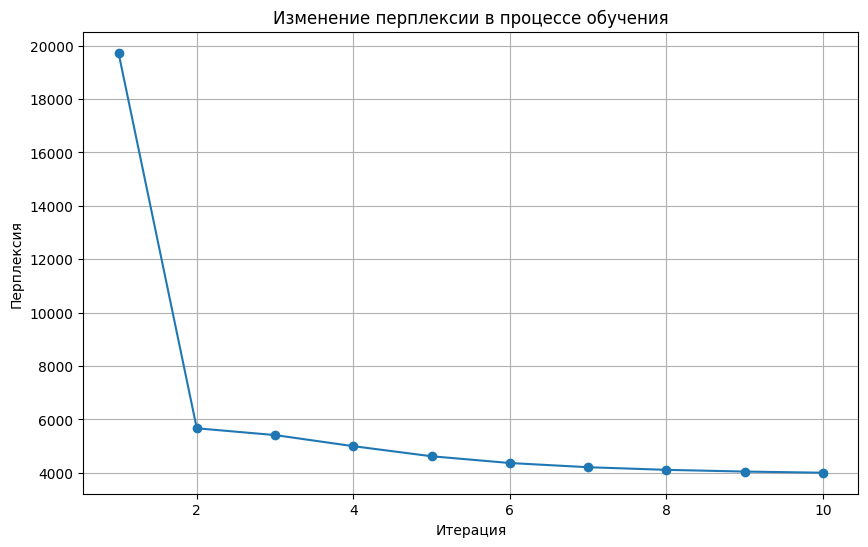

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), lda_model.perplexity_value, marker='o')
plt.title('Изменение перплексии в процессе обучения')
plt.xlabel('Итерация')
plt.ylabel('Перплексия')
plt.grid()
plt.show()

In [ ]:
for topic in lda_model.phi_:
    top_words = lda_model.phi_[topic].nlargest(n=5)
    print(f"Тема: {topic}")
    print("Наиболее вероятные слова:")
    print(top_words)
    print()

Тема: topic_0
Наиболее вероятные слова:
это        0.009919
который    0.008847
человек    0.007608
год        0.005800
такой      0.004708
Name: topic_0, dtype: float32

Тема: topic_1
Наиболее вероятные слова:
год        0.012702
ребёнок    0.012560
это        0.008424
дом        0.007044
свой       0.006297
Name: topic_1, dtype: float32

Тема: topic_2
Наиболее вероятные слова:
это        0.015426
человек    0.011779
который    0.010797
свой       0.008162
такой      0.006451
Name: topic_2, dtype: float32

Тема: topic_3
Наиболее вероятные слова:
который    0.008544
команда    0.007537
москва     0.007180
матч       0.006686
год        0.006490
Name: topic_3, dtype: float32

Тема: topic_4
Наиболее вероятные слова:
это        0.013714
россия     0.010955
год        0.010289
который    0.008708
страна     0.008528
Name: topic_4, dtype: float32

Тема: topic_5
Наиболее вероятные слова:
это        0.008933
который    0.007773
дело       0.005567
человек    0.005045
свой       0.004435
Name:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Bспользование перплексии для подбора оптимального количества тем

In [ ]:
num_topics = 5
lda_model_5 = artm.LDA(num_topics=num_topics, alpha=0.1, beta=0.1, num_document_passes=15, dictionary=batch_vectorizer.dictionary)

lda_model_5.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
lda_model_5.save('lda_p_wt_5', model_name='p_wt')
lda_model_5.save('lda_n_wt_5', model_name='n_wt')
lda_model_5.perplexity_value

[19824.673828125,
 5733.4072265625,
 5610.95703125,
 5382.51025390625,
 5145.28076171875,
 4964.33154296875,
 4821.3818359375,
 4700.69091796875,
 4604.7109375,
 4535.857421875]

In [ ]:
for topic in lda_model_5.phi_:
    top_words = lda_model_5.phi_[topic].nlargest(n=5)
    print(f"Тема: {topic}")
    print("Наиболее вероятные слова:")
    print(top_words)
    print()

Тема: topic_0
Наиболее вероятные слова:
это        0.012096
человек    0.008273
который    0.007644
год        0.006680
такой      0.004606
Name: topic_0, dtype: float32

Тема: topic_1
Наиболее вероятные слова:
это        0.011581
год        0.008034
свой       0.006417
который    0.006413
очень      0.004937
Name: topic_1, dtype: float32

Тема: topic_2
Наиболее вероятные слова:
который    0.008703
человек    0.007251
дело       0.006303
свой       0.005405
один       0.004392
Name: topic_2, dtype: float32

Тема: topic_3
Наиболее вероятные слова:
год        0.013743
который    0.006686
москва     0.006198
рубль      0.004474
новый      0.003955
Name: topic_3, dtype: float32

Тема: topic_4
Наиболее вероятные слова:
это        0.014201
который    0.008889
год        0.008601
россия     0.007570
наш        0.006199
Name: topic_4, dtype: float32



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
num_topics = 15
lda_model_15 = artm.LDA(num_topics=num_topics, alpha=0.1, beta=0.1, num_document_passes=15, dictionary=batch_vectorizer.dictionary)

lda_model_15.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)
lda_model_15.save('lda_p_wt_15', model_name='p_wt')
lda_model_15.save('lda_n_wt_15', model_name='n_wt')
lda_model_15.perplexity_value

[19688.75390625,
 5627.69384765625,
 5304.49609375,
 4809.48388671875,
 4414.50439453125,
 4162.9208984375,
 4006.314697265625,
 3905.0693359375,
 3836.659423828125,
 3789.45361328125]

In [ ]:
for topic in lda_model_15.phi_:
    top_words = lda_model_15.phi_[topic].nlargest(n=5)
    print(f"Тема: {topic}")
    print("Наиболее вероятные слова:")
    print(top_words)
    print()

Тема: topic_0
Наиболее вероятные слова:
который    0.009251
человек    0.008048
это        0.007974
вода       0.004842
год        0.004836
Name: topic_0, dtype: float32

Тема: topic_1
Наиболее вероятные слова:
год        0.012946
ребёнок    0.011167
дом        0.008323
это        0.006788
семья      0.006540
Name: topic_1, dtype: float32

Тема: topic_2
Наиболее вероятные слова:
это        0.017390
человек    0.011904
который    0.010799
свой       0.008460
такой      0.007103
Name: topic_2, dtype: float32

Тема: topic_3
Наиболее вероятные слова:
матч       0.009154
команда    0.008267
который    0.008140
год        0.006630
первый     0.005642
Name: topic_3, dtype: float32

Тема: topic_4
Наиболее вероятные слова:
это        0.013856
год        0.011686
россия     0.010872
страна     0.009344
который    0.008817
Name: topic_4, dtype: float32

Тема: topic_5
Наиболее вероятные слова:
дело       0.008664
который    0.008133
это        0.007354
самолёт    0.006456
свой       0.004539
Name:

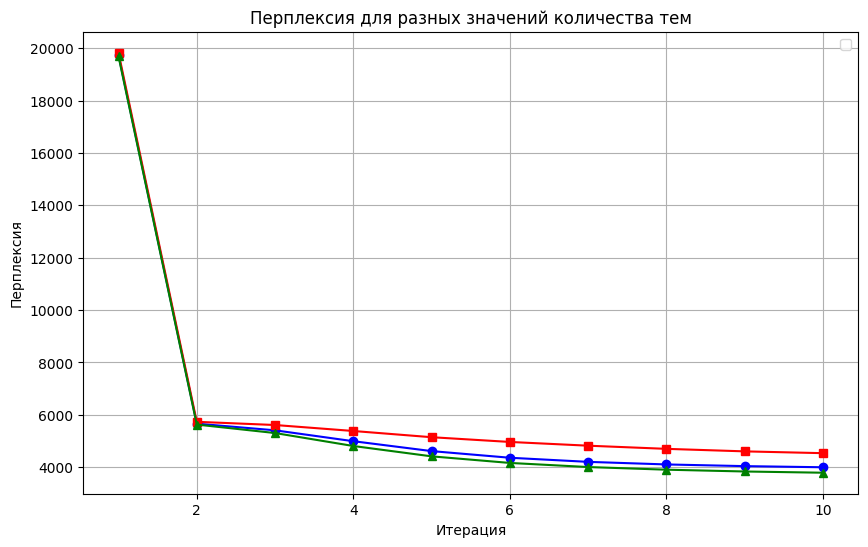

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), lda_model.perplexity_value, color='blue', marker='o')
plt.plot(range(1, 11), lda_model_5.perplexity_value, color='red', marker='s')
plt.plot(range(1, 11), lda_model_15.perplexity_value, color='green', marker='^')
plt.title('Перплексия для разных значений количества тем')
plt.xlabel('Итерация')
plt.ylabel('Перплексия')
plt.legend()
plt.grid()
plt.show()

In [ ]:
batch_vectorizer_test = BatchVectorizer(data_format='bow_n_wd', n_wd=n_wd_test, vocabulary=vocabulary, target_folder='batches_test')


lda_model_15.transform(batch_vectorizer_test)
lda_model_15.perplexity_value

[19688.75390625,
 5627.69384765625,
 5304.49609375,
 4809.48388671875,
 4414.50439453125,
 4162.9208984375,
 4006.314697265625,
 3905.0693359375,
 3836.659423828125,
 3789.45361328125]

In [ ]:
for topic in lda_model_15.phi_:
    top_words = lda_model_15.phi_[topic].nlargest(n=5)
    print(f"Тема: {topic}")
    print("Наиболее вероятные слова:")
    print(top_words)
    print()

Тема: topic_0
Наиболее вероятные слова:
который    0.009251
человек    0.008048
это        0.007974
вода       0.004842
год        0.004836
Name: topic_0, dtype: float32

Тема: topic_1
Наиболее вероятные слова:
год        0.012946
ребёнок    0.011167
дом        0.008323
это        0.006788
семья      0.006540
Name: topic_1, dtype: float32

Тема: topic_2
Наиболее вероятные слова:
это        0.017390
человек    0.011904
который    0.010799
свой       0.008460
такой      0.007103
Name: topic_2, dtype: float32

Тема: topic_3
Наиболее вероятные слова:
матч       0.009154
команда    0.008267
который    0.008140
год        0.006630
первый     0.005642
Name: topic_3, dtype: float32

Тема: topic_4
Наиболее вероятные слова:
это        0.013856
год        0.011686
россия     0.010872
страна     0.009344
который    0.008817
Name: topic_4, dtype: float32

Тема: topic_5
Наиболее вероятные слова:
дело       0.008664
который    0.008133
это        0.007354
самолёт    0.006456
свой       0.004539
Name:

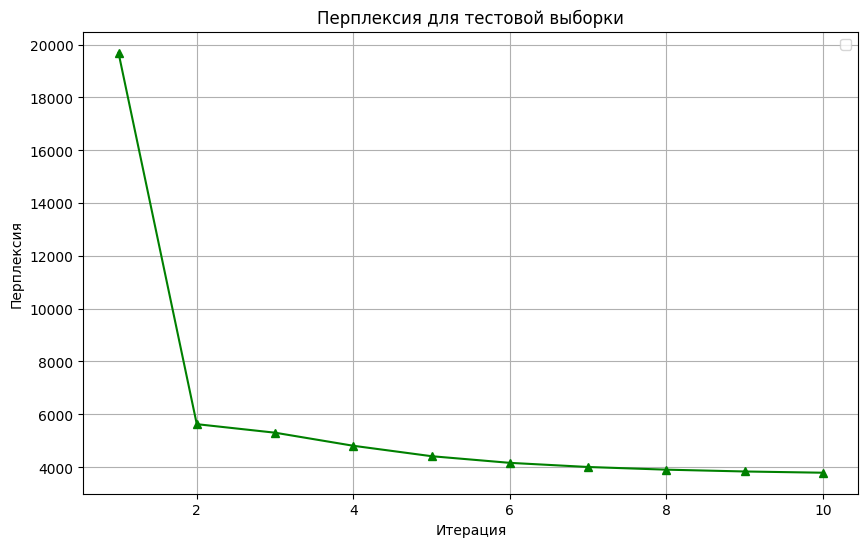

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), lda_model_15.perplexity_value, color='green', marker='^')
plt.title('Перплексия для тестовой выборки')
plt.xlabel('Итерация')
plt.ylabel('Перплексия')
plt.legend()
plt.grid()
plt.show()

# Обучение модельи общего вида, определение темы для тестовой выборки, график перплексии, расчитывание перплексиии тестовой выборки.

In [40]:
batch_vectorizer_test = artm.BatchVectorizer(data_path='batches_test')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


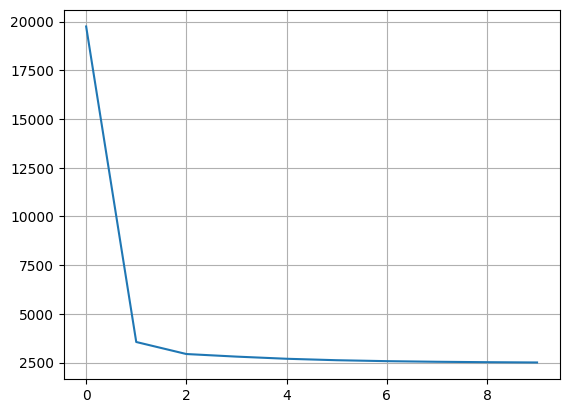

In [41]:
model = artm.ARTM(num_topics=15)
model.scores.add(artm.PerplexityScore(name='perplexity_score'))
model.scores.add(artm.TopTokensScore(name='top_tokens_score'))
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='smooth_sparse_phi_regularizer', tau=-4))

model.initialize(dictionary=batch_vectorizer.dictionary)
model.fit_offline(batch_vectorizer, num_collection_passes=10)
perplexity = model.score_tracker['perplexity_score'].value
plt.plot(perplexity)
plt.grid()
plt.show()

Получение распределения тем для тестовой выборки


In [42]:
topic_distributions = model.transform(batch_vectorizer_test)
topic_distributions

,0,1,2,3,4,5,6,7,8,9,...,747,748,749,750,751,752,753,754,755,756
topic_0,0.123177,0.015746,0.066517,0.000905,0.018632,0.014519,0.023250,0.020421,0.029204,0.090927,...,0.120544,0.082789,0.000835,3.201528e-03,0.019552,0.000123,0.008122,0.043544,0.025825,0.051902
topic_1,0.014105,0.000033,0.001152,0.107259,0.052556,0.170557,0.123537,0.068627,0.000019,0.006966,...,0.206014,0.396079,0.249546,1.898935e-01,0.025062,0.220660,0.026050,0.080270,0.310307,0.187208
topic_2,0.085851,0.025634,0.019342,0.195901,0.102146,0.193558,0.022601,0.035642,0.051212,0.012934,...,0.218950,0.099414,0.104922,2.030213e-01,0.042495,0.195807,0.028234,0.169721,0.217976,0.187110
topic_3,0.030090,0.076043,0.031265,0.068820,0.018472,0.000253,0.045818,0.064057,0.011261,0.231326,...,0.008063,0.009798,0.000032,7.563758e-05,0.053842,0.060865,0.374717,0.019123,0.006570,0.027410
topic_4,0.124509,0.209599,0.082835,0.021170,0.070573,0.022511,0.080317,0.164476,0.206797,0.147576,...,0.146856,0.053407,0.039581,1.471320e-02,0.249263,0.041706,0.034664,0.051630,0.019481,0.175929
topic_5,0.079179,0.136446,0.048722,0.047491,0.128161,0.128403,0.070146,0.107734,0.018989,0.047907,...,0.007415,0.074629,0.047467,8.533105e-02,0.028308,0.041897,0.041689,0.228964,0.034329,0.082515
topic_6,0.045499,0.110674,0.042148,0.071175,0.108500,0.068908,0.007071,0.042786,0.077718,0.037555,...,0.034281,0.015215,0.103728,2.218630e-02,0.143821,0.068610,0.052789,0.024343,0.037954,0.151039
topic_7,0.062965,0.081353,0.027581,0.166455,0.045447,0.114704,0.087431,0.035627,0.060740,0.050872,...,0.081963,0.085369,0.086480,3.927312e-02,0.094435,0.097975,0.056772,0.131127,0.152731,0.010297
topic_8,0.084120,0.031270,0.095499,0.056623,0.121835,0.026915,0.096511,0.018768,0.186479,0.156146,...,0.016888,0.018383,0.000019,2.820131e-05,0.047647,0.018172,0.006690,0.038867,0.003608,0.000004
topic_9,0.027651,0.049935,0.160753,0.083867,0.067288,0.078535,0.013898,0.004524,0.003059,0.014480,...,0.000231,0.053488,0.061622,3.454957e-02,0.020510,0.006145,0.000066,0.001007,0.003626,0.000072


In [50]:
for topic, words in model.score_tracker['top_tokens_score'].last_tokens.items():
    print(f"Тема: {topic}")
    print("Наиболее вероятные слова:")
    print(" ".join(words[:5]))
    print()

Тема: topic_0
Наиболее вероятные слова:
это человек который такой вода

Тема: topic_1
Наиболее вероятные слова:
ребёнок год дом это очень

Тема: topic_2
Наиболее вероятные слова:
человек который свой знать такой

Тема: topic_3
Наиболее вероятные слова:
который год матч первый москва

Тема: topic_4
Наиболее вероятные слова:
это наш год россия страна

Тема: topic_5
Наиболее вероятные слова:
дело который один свой мк

Тема: topic_6
Наиболее вероятные слова:
который человек это свой стать

Тема: topic_7
Наиболее вероятные слова:
это говорить хороший год свой

Тема: topic_8
Наиболее вероятные слова:
год цена который рубль квартира

Тема: topic_9
Наиболее вероятные слова:
машина улица милиция который водитель

Тема: topic_10
Наиболее вероятные слова:
год москва рубль область московский

Тема: topic_11
Наиболее вероятные слова:
россия команда наш президент сборная

Тема: topic_12
Наиболее вероятные слова:
человек это школа работа который

Тема: topic_13
Наиболее вероятные слова:
год день стат

# Использование других алгоритмов

In [52]:
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD

In [54]:
n_topics = 15

lda_sk = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_sk.fit(m_train)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

print_top_words(lda_sk, vectorizer.get_feature_names_out(), 5)

Тема #1:
цена, который, рубль, это, рынок

Тема #2:
вода, пожар, лес, день, дом

Тема #3:
это, человек, ребёнок, который, такой

Тема #4:
суд, дело, год, который, судья

Тема #5:
дом, мк, который, год, один

Тема #6:
это, который, человек, президент, свой

Тема #7:
это, год, свой, который, человек

Тема #8:
матч, который, команда, это, первый

Тема #9:
школа, ребёнок, образование, учитель, родитель

Тема #10:
который, это, человек, самолёт, машина

Тема #11:
год, который, россия, это, свой

Тема #12:
который, закон, сотрудник, документ, это

Тема #13:
москва, город, год, дом, дорога

Тема #14:
год, это, который, россия, новый

Тема #15:
мир, спорт, год, чемпионат, россия



In [55]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, Nmf

In [60]:
dictionary = corpora.Dictionary(df_train_cleaned['text_p'].apply(word_tokenize))
corpus = [dictionary.doc2bow(doc) for doc in df_train_cleaned['text_p'].apply(word_tokenize)]

In [63]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.2 MB/s eta 0:00:00


In [66]:
import pyLDAvis
import pyLDAvis.gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
lda_gensim = LdaModel(corpus=corpus,
                      id2word=dictionary,
                      num_topics=15,
                      random_state=42,
                      passes=10,
                      alpha='auto',
                      per_word_topics=True)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_gensim, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: module 'pyLDAvis' has no attribute 'gensim'

In [67]:
vis = pyLDAvis.gensim.prepare(lda_gensim, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.188064 -0.099575       1        1  23.084108
8      0.173987  0.030404       2        1  17.601032
1      0.220223  0.083240       3        1  16.501527
9      0.199105  0.115165       4        1  14.561281
7      0.181058 -0.064230       5        1   8.705870
6      0.171822 -0.186749       6        1   7.092431
3      0.124739 -0.150034       7        1   4.576795
0      0.104495  0.084510       8        1   3.505684
14     0.049494  0.251420       9        1   2.694235
4     -0.147842  0.054985      10        1   0.777622
12    -0.117523 -0.075221      11        1   0.720143
13    -0.288021 -0.026117      12        1   0.104038
5     -0.287545 -0.006552      13        1   0.031085
10    -0.287052 -0.005466      14        1   0.026930
2     -0.285002 -0.005778      15        1   0.017218, topic_info=               Term          Freq         Total Category  logprob  loglift
109         ребёнок   4255.000000   4255.000000  Default  30.0000  30.0000
1333          школа   1863.000000   1863.000000  Default  29.0000  29.0000
15              год  16242.000000  16242.000000  Default  28.0000  28.0000
1984         машина   1939.000000   1939.000000  Default  27.0000  27.0000
167            дело   5435.000000   5435.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
41254         эголь      0.074697      0.779792  Topic15  -8.4173   6.3214
32912  опечатывание      0.074425      0.779519  Topic15  -8.4209   6.3181
22012          клещ      0.690124      7.596064  Topic15  -6.1939   6.2684
31089         хализ      0.288002      6.339246  Topic15  -7.0678   5.5754
8015        семёнов      0.094949     35.727762  Topic15  -8.1774   2.7366

[1092 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
35635     13  0.753943   1060
824        1  0.022110   2010
824        2  0.064949   2010
824        3  0.116078   2010
824        4  0.628758   2010
...      ...       ...    ...
2787       6  0.202718  яркий
2787       7  0.024133  яркий
2787       8  0.004827  яркий
2787      12  0.024133  яркий
3631       8  0.984008   ёжик

[3088 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 9, 2, 10, 8, 7, 4, 1, 15, 5, 13, 14, 6, 11, 3])

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_train_cleaned['text_p'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
nmf_sk = NMF(n_components=15, random_state=42)
nmf_sk.fit(X_tfidf)

print_top_words(nmf_sk, tfidf_vectorizer.get_feature_names_out(), 10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Тема #1:
это, человек, говорить, очень, знать, такой, жизнь, сказать, наш, мой

Тема #2:
спорт, олимпийский, чемпионат, спортсмен, мир, тренер, сборная, чемпион, соревнование, турнир

Тема #3:
москва, строительство, город, мэр, объект, московский, год, проект, памятник, городской

Тема #4:
мужчина, задержать, милиция, квартира, мк, милиционер, женщина, дом, оперативник, стража

Тема #5:
ребёнок, родитель, семья, мама, девочка, мать, детский, мальчик, сын, малыш

Тема #6:
суд, дело, судья, адвокат, судебный, уголовный, закон, решение, следствие, право

Тема #7:
матч, команда, игрок, сборная, игра, спартак, клуб, футбол, тренер, цска

Тема #8:
водитель, машина, автомобиль, дорога, дтп, движение, гибдд, дорожный, пассажир, инспектор

Тема #9:
пациент, врач, лечение, медицинский, больной, помощь, заболевание, больница, операция, клиника

Тема #10:
фильм, песня, актёр, концерт, режиссёр, кино, артист, сцена, роль, театр

Тема #11:
рубль, год, цена, руб, млрд, тыс, млн, рынок, рост, бюджет



In [73]:
!pip install wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
def plotWordCloud_Gensim(topic_number,topics,head):
    text = dict(topics[topic_number][1])
    wordcloud = WordCloud(background_color="white", max_words=100, width=900, height=900, collocations=False)
    wordcloud = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(15, 10))
    plt.title((head+" номер {}").format(topic_number))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
nmf_gensim = Nmf(corpus=corpus,
                id2word=dictionary,
                num_topics=15,
                random_state=42,
                chunksize=100,
                passes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:578: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:607: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:620: Deprecati

KeyboardInterrupt: 

In [78]:
svd = TruncatedSVD(n_components=15, random_state=42)
svd.fit(X_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TruncatedSVD(n_components=15, random_state=42)

In [83]:
print_top_words(svd, tfidf_vectorizer.get_feature_names_out(), 5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Тема #1:
это, год, который, человек, свой

Тема #2:
команда, матч, сборная, чемпионат, игра

Тема #3:
ребёнок, это, человек, фильм, очень

Тема #4:
это, страна, власть, наш, россия

Тема #5:
ребёнок, школа, родитель, образование, учитель

Тема #6:
суд, ребёнок, дело, школа, матч

Тема #7:
матч, рубль, спартак, цена, игрок

Тема #8:
год, квартира, рубль, цена, тыс

Тема #9:
школа, москва, матч, строительство, мэр

Тема #10:
суд, рубль, судья, фильм, водитель

Тема #11:
школа, рубль, водитель, учитель, машина

Тема #12:
ребёнок, машина, водитель, цена, семья

Тема #13:
самолёт, экипаж, суд, полёт, школа

Тема #14:
ребёнок, год, песня, самолёт, суд

Тема #15:
самолёт, спорт, год, фильм, млрд

